In [1]:
%matplotlib inline

In [2]:
import numpy as np
import openturns as ot
import matplotlib.pyplot as plt
import ctbenchmark as ctb

# Gaussian peak problem description

In [3]:
problem = ctb.CentralTendencyGaussianPeakProblem2N()
function = problem.getFunction()
distribution = problem.getDistribution()
problem_name = problem.getName()

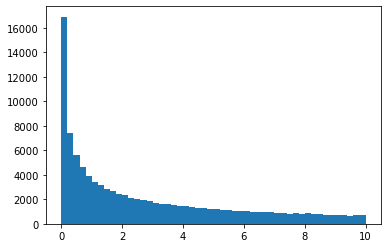

In [4]:
## Output pdf illustration
output_rv = problem.getRandomVector()
output_sample = output_rv.getSample(100000)
plt.hist(np.array(output_sample).flatten(), 50);

# Benchmark

In [5]:
doe_generator = ctb.CentralTendencyBenchmark()
candidate_points = doe_generator.generate_sample('sobol', 2**13, distribution, None)

In [12]:
x_bench_sizes = list(range(6, 20, 2)) + list(range(20, 50, 5)) + list(range(50, 160, 10))
my_methods = ['kernel herding', 'support points', 'sobol']
bench = ctb.CentralTendencyBenchmark(my_methods, x_bench_sizes)

In [7]:
df_benchmark = bench.run_benchmark([problem], candidate_points)
df_benchmark = df_benchmark.reset_index()
df_benchmark.to_csv('results/ct_benchmark_{}.csv'.format(problem_name), index=False)

START: problem=Gaussian Peak 2D (normal input) | method=sobol
START: problem=Gaussian Peak 2D (normal input) | method=kernel herding
START: problem=Gaussian Peak 2D (normal input) | method=support points
DONE: problem=Gaussian Peak 2D (normal input) | method=sobol
DONE: problem=Gaussian Peak 2D (normal input) | method=support points
DONE: problem=Gaussian Peak 2D (normal input) | method=kernel herding


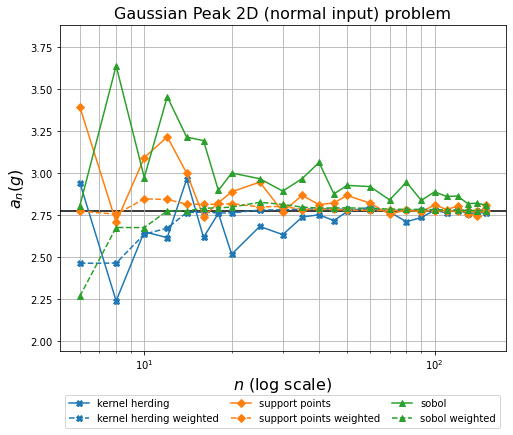

In [13]:
sfile = 'figures/{}_convergence.pdf'.format(problem_name)
figure = bench.plot_ct_benchmark(df_benchmark, problem_name, methods=my_methods, save_file=sfile);

In [9]:
 1 / (20 ** (1 / 2))

0.22360679774997896